<a href="https://colab.research.google.com/github/acewolfag/modelFaceNet/blob/main/newnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
acewolfag_original_images_path = kagglehub.dataset_download('acewolfag/original-images')
baocaoai_mtcnndataset_path = kagglehub.dataset_download('baocaoai/mtcnndataset')

print('Data source import complete.')


100%|██████████| 736M/736M [00:48<00:00, 15.8MB/s]

Extracting files...


100%|██████████| 114M/114M [00:09<00:00, 13.1MB/s]

Extracting files...


Data source import complete.


In [2]:
!pip install torch torchvision torchaudio
!pip install mtcnn opencv-python
!pip install tensorflow
!pip install matplotlib numpy
!pip install facenet-pytorch
!pip install scikit-learn joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.

In [ ]:
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
import cv2
import os

# Kiểm tra GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Sử dụng {len(gpus)} GPU(s):", gpus)
else:
    print("GPU không khả dụng, sử dụng CPU.")

def detect_and_save_faces(input_folder, output_folder, device):
    # Giả sử input_folder là thư mục chứa ảnh
    # Không lặp thêm thư mục con ở đây, vì main code đã làm điều này.
    with tf.device(device):
        detector = MTCNN()

        # Tạo thư mục đầu ra tương ứng
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Duyệt qua các file trong thư mục đầu vào
        for filename in os.listdir(input_folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Đọc ảnh
                image_path = os.path.join(input_folder, filename)
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Không thể đọc file {filename}, bỏ qua.")
                    continue

                # Phát hiện khuôn mặt
                detections = detector.detect_faces(image)

                # Cắt và lưu từng khuôn mặt
                for i, detection in enumerate(detections):
                    x, y, width, height = detection['box']
                    x, y = max(0, x), max(0, y)  # Đảm bảo tọa độ không âm
                    cropped_face = image[y:y + height, x:x + width]

                    # Lưu khuôn mặt
                    face_filename = f"{os.path.splitext(filename)[0]}_face{i + 1}.jpg"
                    output_face_path = os.path.join(output_folder, face_filename)
                    cv2.imwrite(output_face_path, cropped_face)

                print(f"Đã xử lý file: {filename} trên {device}")

# Đường dẫn thư mục đầu vào và đầu ra
input_folder = '/kaggle/input/original-images/Original Images'  # Thay bằng đường dẫn tới thư mục ảnh đầu vào
output_folder = '/kaggle/working/new'  # Thay bằng đường dẫn tới thư mục đầu ra

folders = [f for f in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, f))]
num_folders = len(folders)
half = num_folders // 2

gpu_list = tf.config.list_physical_devices('GPU')
num_gpus = len(gpu_list)

if num_gpus < 2:
    # Nếu chỉ có một GPU, bạn có thể xử lý tất cả trên GPU:0
    for folder in folders:
        detect_and_save_faces(
            input_folder=os.path.join(input_folder, folder),
            output_folder=os.path.join(output_folder, folder),
            device="/GPU:0" if num_gpus > 0 else "/CPU:0"
        )
else:
    # Nếu có 2 GPU
    for folder in folders[:half]:
        detect_and_save_faces(
            input_folder=os.path.join(input_folder, folder),
            output_folder=os.path.join(output_folder, folder),
            device="/GPU:0"
        )

    for folder in folders[half:]:
        detect_and_save_faces(
            input_folder=os.path.join(input_folder, folder),
            output_folder=os.path.join(output_folder, folder),
            device="/GPU:1"
        )


Sử dụng 2 GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Đã xử lý file: Alia Bhatt_4.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_33.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_17.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_45.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_51.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_34.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_65.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_39.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_29.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_64.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_52.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_42.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_48.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_15.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_36.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_53.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_14.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_31.jpg trên /GPU:0
Đã xử lý file: Alia Bhatt_68.jpg trên /G

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [61]:
class TripletDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.image_paths = {}

        # Filter out classes with no images
        for cls in self.classes:
            class_path = os.path.join(root_dir, cls)
            if os.path.isdir(class_path):
                images = [os.path.join(class_path, img) for img in os.listdir(class_path)
                          if os.path.isfile(os.path.join(class_path, img))]
                if images:  # Only add classes with images
                    self.image_paths[cls] = images
                else:
                    print(f"Warning: Class '{cls}' has no images and will be skipped.")

        # Update classes list to reflect only those with images
        self.classes = list(self.image_paths.keys())

    def __getitem__(self, index):
        # Handle case where no classes have images
        if not self.classes:
            raise ValueError("No classes with images found in the dataset.")

        # Chọn ngẫu nhiên một class
        anchor_class = np.random.choice(self.classes)
        positive_class = anchor_class

        # Ensure negative_class is different from anchor_class and has images
        while True:
            negative_class = np.random.choice(self.classes)
            if negative_class != anchor_class and self.image_paths.get(negative_class, []):
                break

        # Lấy ảnh anchor và positive từ cùng một class, negative từ class khác
        anchor_img = np.random.choice(self.image_paths[anchor_class])
        positive_img = np.random.choice(self.image_paths[positive_class])
        negative_img = np.random.choice(self.image_paths[negative_class])

        # Load ảnh và áp dụng transform
        anchor = Image.open(anchor_img).convert("RGB")
        positive = Image.open(positive_img).convert("RGB")
        negative = Image.open(negative_img).convert("RGB")

        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative

    def __len__(self):
        # Handle case where no classes have images
        if not self.classes:
            return 0
        return len(self.classes) * 10  # Giả định số lượng triplets

In [62]:
!cp -r /root/.cache/kagglehub/datasets/baocaoai/mtcnndataset/versions/1/content/new /content/new1

In [80]:
!cp -r '/root/.cache/kagglehub/datasets/acewolfag/original-images/versions/1/Original Images' /content/new2

In [63]:
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Dataset và Dataloader
dataset = TripletDataset("/content/new1", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [64]:
class FaceNet(nn.Module):
    def __init__(self, embedding_size=128):
        super(FaceNet, self).__init__()
        # Sử dụng weights thay vì pretrained
        self.inception = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT)

        # Tắt aux_logits sau khi khởi tạo
        self.inception.aux_logits = False

        # Thay thế tầng fully connected cuối cùng
        self.inception.fc = nn.Linear(self.inception.fc.in_features, embedding_size)

        # Thêm normalization
        self.l2_normalize = nn.functional.normalize

    def forward(self, x):
        x = self.inception(x)  # Extract features
        x = self.l2_normalize(x, p=2, dim=1)  # L2-normalize the embeddings
        return x


# Khởi tạo mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FaceNet(embedding_size=128).to(device)

In [65]:
class TripletLoss(nn.Module):
    def __init__(self, margin=0.2):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        positive_dist = torch.sum((anchor - positive) ** 2, dim=1)
        negative_dist = torch.sum((anchor - negative) ** 2, dim=1)
        loss = torch.clamp(positive_dist - negative_dist + self.margin, min=0.0)
        return loss.mean()

criterion = TripletLoss(margin=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [66]:
def train_with_logging(model, dataloader, criterion, optimizer, epochs, device):
    loss_history = []  # Lưu loss qua các epoch
    accuracy_history = []  # Lưu accuracy qua các epoch

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        correct = 0
        total = 0

        # Thanh tiến trình
        with tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}") as progress:
            for batch in progress:
                anchor, positive, negative = batch
                anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)

                optimizer.zero_grad()

                # Forward pass
                anchor_out = model(anchor)
                positive_out = model(positive)
                negative_out = model(negative)

                loss = criterion(anchor_out, positive_out, negative_out)
                loss.backward()
                optimizer.step()

                # Cập nhật loss và tiến trình
                epoch_loss += loss.item()

                # Accuracy giả lập (triplet loss không có trực tiếp accuracy)
                batch_correct = (torch.norm(anchor_out - positive_out, p=2, dim=1) <
                                 torch.norm(anchor_out - negative_out, p=2, dim=1)).sum().item()
                correct += batch_correct
                total += anchor.size(0)

                progress.set_postfix(loss=loss.item(), accuracy=batch_correct / anchor.size(0))

        # Tính toán độ đo cho epoch
        epoch_loss /= len(dataloader)
        epoch_accuracy = correct / total

        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)

        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Vẽ biểu đồ loss và accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), loss_history, marker='o', label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), accuracy_history, marker='o', label='Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

Epoch 1/100: 100%|██████████| 9/9 [00:19<00:00,  2.14s/it, accuracy=0.583, loss=0.202]


Epoch 1/100 - Loss: 0.1886, Accuracy: 0.5679


Epoch 2/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.667, loss=0.157]


Epoch 2/100 - Loss: 0.1583, Accuracy: 0.6357


Epoch 3/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=0.75, loss=0.107]


Epoch 3/100 - Loss: 0.1437, Accuracy: 0.6714


Epoch 4/100: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it, accuracy=0.708, loss=0.135]


Epoch 4/100 - Loss: 0.1096, Accuracy: 0.7679


Epoch 5/100: 100%|██████████| 9/9 [00:16<00:00,  1.80s/it, accuracy=0.792, loss=0.0906]


Epoch 5/100 - Loss: 0.1019, Accuracy: 0.7857


Epoch 6/100: 100%|██████████| 9/9 [00:16<00:00,  1.79s/it, accuracy=0.792, loss=0.113]


Epoch 6/100 - Loss: 0.0955, Accuracy: 0.7893


Epoch 7/100: 100%|██████████| 9/9 [00:16<00:00,  1.80s/it, accuracy=0.833, loss=0.0884]


Epoch 7/100 - Loss: 0.0824, Accuracy: 0.8214


Epoch 8/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=0.75, loss=0.108]


Epoch 8/100 - Loss: 0.0843, Accuracy: 0.8107


Epoch 9/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=0.875, loss=0.0766]


Epoch 9/100 - Loss: 0.1014, Accuracy: 0.7750


Epoch 10/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=0.75, loss=0.136]


Epoch 10/100 - Loss: 0.0809, Accuracy: 0.8393


Epoch 11/100: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it, accuracy=0.75, loss=0.125]


Epoch 11/100 - Loss: 0.0831, Accuracy: 0.8143


Epoch 12/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=0.708, loss=0.137]


Epoch 12/100 - Loss: 0.0839, Accuracy: 0.8321


Epoch 13/100: 100%|██████████| 9/9 [00:16<00:00,  1.80s/it, accuracy=0.792, loss=0.092]


Epoch 13/100 - Loss: 0.0866, Accuracy: 0.8214


Epoch 14/100: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it, accuracy=0.875, loss=0.0523]


Epoch 14/100 - Loss: 0.0683, Accuracy: 0.8571


Epoch 15/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=0.875, loss=0.067]


Epoch 15/100 - Loss: 0.0706, Accuracy: 0.8536


Epoch 16/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=0.917, loss=0.0578]


Epoch 16/100 - Loss: 0.0713, Accuracy: 0.8464


Epoch 17/100: 100%|██████████| 9/9 [00:16<00:00,  1.82s/it, accuracy=0.833, loss=0.082]


Epoch 17/100 - Loss: 0.0730, Accuracy: 0.8250


Epoch 18/100: 100%|██████████| 9/9 [00:16<00:00,  1.80s/it, accuracy=0.75, loss=0.104]


Epoch 18/100 - Loss: 0.0695, Accuracy: 0.8464


Epoch 19/100: 100%|██████████| 9/9 [00:17<00:00,  1.95s/it, accuracy=0.917, loss=0.0554]


Epoch 19/100 - Loss: 0.0645, Accuracy: 0.8643


Epoch 20/100: 100%|██████████| 9/9 [00:19<00:00,  2.12s/it, accuracy=0.833, loss=0.0806]


Epoch 20/100 - Loss: 0.0763, Accuracy: 0.8393


Epoch 21/100: 100%|██████████| 9/9 [00:17<00:00,  1.93s/it, accuracy=0.917, loss=0.0386]


Epoch 21/100 - Loss: 0.0530, Accuracy: 0.9000


Epoch 22/100: 100%|██████████| 9/9 [00:17<00:00,  1.95s/it, accuracy=0.875, loss=0.06]


Epoch 22/100 - Loss: 0.0679, Accuracy: 0.8571


Epoch 23/100: 100%|██████████| 9/9 [00:18<00:00,  2.05s/it, accuracy=0.917, loss=0.0287]


Epoch 23/100 - Loss: 0.0599, Accuracy: 0.8714


Epoch 24/100: 100%|██████████| 9/9 [00:16<00:00,  1.81s/it, accuracy=0.792, loss=0.103]


Epoch 24/100 - Loss: 0.0606, Accuracy: 0.8821


Epoch 25/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=1, loss=0.0151]


Epoch 25/100 - Loss: 0.0554, Accuracy: 0.8786


Epoch 26/100: 100%|██████████| 9/9 [00:16<00:00,  1.83s/it, accuracy=0.917, loss=0.0426]


Epoch 26/100 - Loss: 0.0530, Accuracy: 0.8964


Epoch 27/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.917, loss=0.0402]


Epoch 27/100 - Loss: 0.0513, Accuracy: 0.8786


Epoch 28/100: 100%|██████████| 9/9 [00:16<00:00,  1.83s/it, accuracy=0.875, loss=0.0399]


Epoch 28/100 - Loss: 0.0547, Accuracy: 0.8714


Epoch 29/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=1, loss=0.0156]


Epoch 29/100 - Loss: 0.0522, Accuracy: 0.8857


Epoch 30/100: 100%|██████████| 9/9 [00:16<00:00,  1.80s/it, accuracy=0.875, loss=0.0665]


Epoch 30/100 - Loss: 0.0437, Accuracy: 0.9143


Epoch 31/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=0.875, loss=0.054]


Epoch 31/100 - Loss: 0.0479, Accuracy: 0.9107


Epoch 32/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=1, loss=0.00796]


Epoch 32/100 - Loss: 0.0433, Accuracy: 0.9036


Epoch 33/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=0.958, loss=0.0194]


Epoch 33/100 - Loss: 0.0399, Accuracy: 0.9071


Epoch 34/100: 100%|██████████| 9/9 [00:16<00:00,  1.81s/it, accuracy=0.958, loss=0.0269]


Epoch 34/100 - Loss: 0.0345, Accuracy: 0.9286


Epoch 35/100: 100%|██████████| 9/9 [00:15<00:00,  1.74s/it, accuracy=0.875, loss=0.0348]


Epoch 35/100 - Loss: 0.0355, Accuracy: 0.9214


Epoch 36/100: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it, accuracy=0.875, loss=0.0529]


Epoch 36/100 - Loss: 0.0311, Accuracy: 0.9321


Epoch 37/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=0.958, loss=0.0232]


Epoch 37/100 - Loss: 0.0253, Accuracy: 0.9500


Epoch 38/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=0.958, loss=0.0373]


Epoch 38/100 - Loss: 0.0290, Accuracy: 0.9464


Epoch 39/100: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it, accuracy=1, loss=0.00469]


Epoch 39/100 - Loss: 0.0319, Accuracy: 0.9286


Epoch 40/100: 100%|██████████| 9/9 [00:15<00:00,  1.74s/it, accuracy=1, loss=0.00266]


Epoch 40/100 - Loss: 0.0169, Accuracy: 0.9679


Epoch 41/100: 100%|██████████| 9/9 [00:15<00:00,  1.74s/it, accuracy=0.833, loss=0.0727]


Epoch 41/100 - Loss: 0.0216, Accuracy: 0.9607


Epoch 42/100: 100%|██████████| 9/9 [00:16<00:00,  1.82s/it, accuracy=0.917, loss=0.0375]


Epoch 42/100 - Loss: 0.0307, Accuracy: 0.9321


Epoch 43/100: 100%|██████████| 9/9 [00:15<00:00,  1.71s/it, accuracy=0.875, loss=0.0584]


Epoch 43/100 - Loss: 0.0329, Accuracy: 0.9286


Epoch 44/100: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it, accuracy=0.875, loss=0.037]


Epoch 44/100 - Loss: 0.0382, Accuracy: 0.9179


Epoch 45/100: 100%|██████████| 9/9 [00:16<00:00,  1.79s/it, accuracy=0.917, loss=0.047]


Epoch 45/100 - Loss: 0.0434, Accuracy: 0.8964


Epoch 46/100: 100%|██████████| 9/9 [00:16<00:00,  1.82s/it, accuracy=0.875, loss=0.0491]


Epoch 46/100 - Loss: 0.0311, Accuracy: 0.9286


Epoch 47/100: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it, accuracy=1, loss=0]


Epoch 47/100 - Loss: 0.0168, Accuracy: 0.9571


Epoch 48/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.875, loss=0.0393]


Epoch 48/100 - Loss: 0.0380, Accuracy: 0.9036


Epoch 49/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.958, loss=0.0114]


Epoch 49/100 - Loss: 0.0268, Accuracy: 0.9464


Epoch 50/100: 100%|██████████| 9/9 [00:16<00:00,  1.79s/it, accuracy=0.875, loss=0.033]


Epoch 50/100 - Loss: 0.0244, Accuracy: 0.9464


Epoch 51/100: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it, accuracy=1, loss=0.00381]


Epoch 51/100 - Loss: 0.0262, Accuracy: 0.9429


Epoch 52/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.958, loss=0.0348]


Epoch 52/100 - Loss: 0.0349, Accuracy: 0.9429


Epoch 53/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=0.75, loss=0.103]


Epoch 53/100 - Loss: 0.0232, Accuracy: 0.9607


Epoch 54/100: 100%|██████████| 9/9 [00:16<00:00,  1.83s/it, accuracy=0.958, loss=0.00913]


Epoch 54/100 - Loss: 0.0350, Accuracy: 0.9143


Epoch 55/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=0.875, loss=0.0529]


Epoch 55/100 - Loss: 0.0260, Accuracy: 0.9464


Epoch 56/100: 100%|██████████| 9/9 [00:15<00:00,  1.70s/it, accuracy=1, loss=0]


Epoch 56/100 - Loss: 0.0144, Accuracy: 0.9714


Epoch 57/100: 100%|██████████| 9/9 [00:16<00:00,  1.78s/it, accuracy=1, loss=0]


Epoch 57/100 - Loss: 0.0154, Accuracy: 0.9607


Epoch 58/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=1, loss=0.0143]


Epoch 58/100 - Loss: 0.0179, Accuracy: 0.9786


Epoch 59/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=1, loss=0]


Epoch 59/100 - Loss: 0.0193, Accuracy: 0.9607


Epoch 60/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.958, loss=0.0246]


Epoch 60/100 - Loss: 0.0168, Accuracy: 0.9714


Epoch 61/100: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it, accuracy=0.917, loss=0.0421]


Epoch 61/100 - Loss: 0.0267, Accuracy: 0.9429


Epoch 62/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.917, loss=0.0474]


Epoch 62/100 - Loss: 0.0275, Accuracy: 0.9393


Epoch 63/100: 100%|██████████| 9/9 [00:16<00:00,  1.79s/it, accuracy=0.958, loss=0.00926]


Epoch 63/100 - Loss: 0.0277, Accuracy: 0.9393


Epoch 64/100: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it, accuracy=1, loss=0.016]


Epoch 64/100 - Loss: 0.0281, Accuracy: 0.9500


Epoch 65/100: 100%|██████████| 9/9 [00:15<00:00,  1.74s/it, accuracy=1, loss=0]


Epoch 65/100 - Loss: 0.0228, Accuracy: 0.9500


Epoch 66/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=0.958, loss=0.0379]


Epoch 66/100 - Loss: 0.0282, Accuracy: 0.9464


Epoch 67/100: 100%|██████████| 9/9 [00:15<00:00,  1.74s/it, accuracy=0.917, loss=0.0306]


Epoch 67/100 - Loss: 0.0304, Accuracy: 0.9393


Epoch 68/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=1, loss=0.00223]


Epoch 68/100 - Loss: 0.0095, Accuracy: 0.9821


Epoch 69/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=0.833, loss=0.0857]


Epoch 69/100 - Loss: 0.0353, Accuracy: 0.9393


Epoch 70/100: 100%|██████████| 9/9 [00:16<00:00,  1.78s/it, accuracy=0.917, loss=0.0503]


Epoch 70/100 - Loss: 0.0139, Accuracy: 0.9750


Epoch 71/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=1, loss=0.0048]


Epoch 71/100 - Loss: 0.0096, Accuracy: 0.9786


Epoch 72/100: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it, accuracy=0.917, loss=0.0459]


Epoch 72/100 - Loss: 0.0350, Accuracy: 0.9357


Epoch 73/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.875, loss=0.0402]


Epoch 73/100 - Loss: 0.0213, Accuracy: 0.9571


Epoch 74/100: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it, accuracy=0.958, loss=0.0199]


Epoch 74/100 - Loss: 0.0110, Accuracy: 0.9893


Epoch 75/100: 100%|██████████| 9/9 [00:16<00:00,  1.79s/it, accuracy=0.917, loss=0.0491]


Epoch 75/100 - Loss: 0.0276, Accuracy: 0.9500


Epoch 76/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=1, loss=0.0268]


Epoch 76/100 - Loss: 0.0207, Accuracy: 0.9679


Epoch 77/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=1, loss=0]


Epoch 77/100 - Loss: 0.0184, Accuracy: 0.9750


Epoch 78/100: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it, accuracy=1, loss=0]


Epoch 78/100 - Loss: 0.0092, Accuracy: 0.9857


Epoch 79/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=1, loss=0.00639]


Epoch 79/100 - Loss: 0.0181, Accuracy: 0.9536


Epoch 80/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=1, loss=0]


Epoch 80/100 - Loss: 0.0165, Accuracy: 0.9750


Epoch 81/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=1, loss=0.00366]


Epoch 81/100 - Loss: 0.0111, Accuracy: 0.9821


Epoch 82/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.833, loss=0.068]


Epoch 82/100 - Loss: 0.0260, Accuracy: 0.9464


Epoch 83/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=1, loss=0]


Epoch 83/100 - Loss: 0.0079, Accuracy: 0.9893


Epoch 84/100: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it, accuracy=1, loss=0.0153]


Epoch 84/100 - Loss: 0.0147, Accuracy: 0.9786


Epoch 85/100: 100%|██████████| 9/9 [00:15<00:00,  1.74s/it, accuracy=1, loss=0]


Epoch 85/100 - Loss: 0.0179, Accuracy: 0.9643


Epoch 86/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.917, loss=0.0191]


Epoch 86/100 - Loss: 0.0186, Accuracy: 0.9643


Epoch 87/100: 100%|██████████| 9/9 [00:15<00:00,  1.74s/it, accuracy=1, loss=0]


Epoch 87/100 - Loss: 0.0073, Accuracy: 0.9821


Epoch 88/100: 100%|██████████| 9/9 [00:15<00:00,  1.73s/it, accuracy=1, loss=0]


Epoch 88/100 - Loss: 0.0217, Accuracy: 0.9607


Epoch 89/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=0.833, loss=0.072]


Epoch 89/100 - Loss: 0.0244, Accuracy: 0.9536


Epoch 90/100: 100%|██████████| 9/9 [00:15<00:00,  1.70s/it, accuracy=1, loss=0.00108]


Epoch 90/100 - Loss: 0.0098, Accuracy: 0.9821


Epoch 91/100: 100%|██████████| 9/9 [00:16<00:00,  1.78s/it, accuracy=1, loss=0.00379]


Epoch 91/100 - Loss: 0.0151, Accuracy: 0.9714


Epoch 92/100: 100%|██████████| 9/9 [00:16<00:00,  1.82s/it, accuracy=0.917, loss=0.032]


Epoch 92/100 - Loss: 0.0253, Accuracy: 0.9607


Epoch 93/100: 100%|██████████| 9/9 [00:15<00:00,  1.77s/it, accuracy=1, loss=0]


Epoch 93/100 - Loss: 0.0093, Accuracy: 0.9821


Epoch 94/100: 100%|██████████| 9/9 [00:15<00:00,  1.72s/it, accuracy=0.958, loss=0.0296]


Epoch 94/100 - Loss: 0.0199, Accuracy: 0.9571


Epoch 95/100: 100%|██████████| 9/9 [00:15<00:00,  1.74s/it, accuracy=1, loss=0]


Epoch 95/100 - Loss: 0.0087, Accuracy: 0.9821


Epoch 96/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=0.958, loss=0.0227]


Epoch 96/100 - Loss: 0.0058, Accuracy: 0.9929


Epoch 97/100: 100%|██████████| 9/9 [00:15<00:00,  1.71s/it, accuracy=1, loss=0]


Epoch 97/100 - Loss: 0.0051, Accuracy: 0.9893


Epoch 98/100: 100%|██████████| 9/9 [00:15<00:00,  1.75s/it, accuracy=1, loss=0]


Epoch 98/100 - Loss: 0.0106, Accuracy: 0.9786


Epoch 99/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=1, loss=0]


Epoch 99/100 - Loss: 0.0236, Accuracy: 0.9607


Epoch 100/100: 100%|██████████| 9/9 [00:15<00:00,  1.76s/it, accuracy=1, loss=0.0165]


Epoch 100/100 - Loss: 0.0223, Accuracy: 0.9571


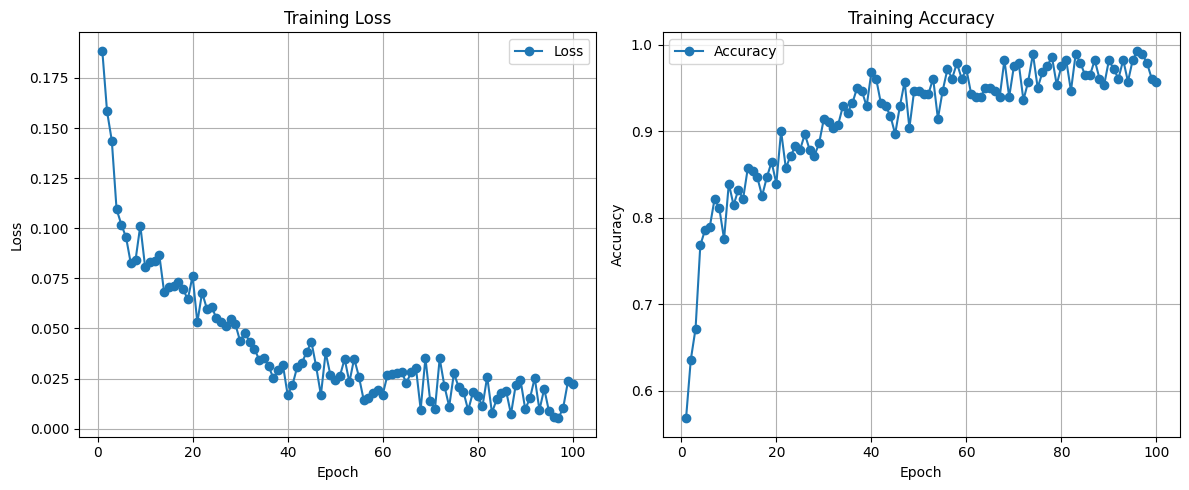

In [67]:
train_with_logging(
    model=model,
    dataloader=dataloader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=100,
    device=device
)

In [68]:
torch.save(model.state_dict(), "facenet_triplet.pth")


In [69]:
model = FaceNet(embedding_size=128).to(device)
model.load_state_dict(torch.load("facenet_triplet.pth"))
model.eval()


FaceNet(
  (inception): Inception3(
    (Conv2d_1a_3x3): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2a_3x3): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_2b_3x3): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (Conv2d_3b_1x1): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (Conv2d_4a_3x3): Basic

In [81]:
import os
import shutil
from sklearn.model_selection import train_test_split
source_folder = "/content/new2"
train_folder = "/content/train"
val_folder = "/content/val"

# Tạo thư mục train và val nếu chưa có
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Lặp qua tất cả các folder (tương ứng với từng class)
for person in os.listdir(source_folder):
    person_path = os.path.join(source_folder, person)

    # Kiểm tra nếu đó là một folder
    if os.path.isdir(person_path):
        # Lấy danh sách các file trong folder person
        images = os.listdir(person_path)

        # Chia dữ liệu theo tỷ lệ train và val
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

        # Tạo thư mục cho class trong train và val
        train_class_folder = os.path.join(train_folder, person)
        val_class_folder = os.path.join(val_folder, person)
        os.makedirs(train_class_folder, exist_ok=True)
        os.makedirs(val_class_folder, exist_ok=True)

        # Di chuyển file vào thư mục tương ứng
        for image in train_images:
            shutil.copy(os.path.join(person_path, image), os.path.join(train_class_folder, image))

        for image in val_images:
            shutil.copy(os.path.join(person_path, image), os.path.join(val_class_folder, image))

        print(f"Đã hoàn thành phân chia cho class {person}")

print("Đã hoàn tất phân chia dữ liệu!")

Đã hoàn thành phân chia cho class Charlize Theron
Đã hoàn thành phân chia cho class Dwayne Johnson
Đã hoàn thành phân chia cho class Claire Holt
Đã hoàn thành phân chia cho class Robert Downey Jr
Đã hoàn thành phân chia cho class Khánh Huy
Đã hoàn thành phân chia cho class Hugh Jackman
Đã hoàn thành phân chia cho class Alia Bhatt
Đã hoàn thành phân chia cho class Priyanka Chopra
Đã hoàn thành phân chia cho class Zac Efron
Đã hoàn thành phân chia cho class Courtney Cox
Đã hoàn thành phân chia cho class Hrithik Roshan
Đã hoàn thành phân chia cho class Akshay Kumar
Đã hoàn thành phân chia cho class Natalie Portman
Đã hoàn thành phân chia cho class Andy Samberg
Đã hoàn thành phân chia cho class Amitabh Bachchan
Đã hoàn thành phân chia cho class Brad Pitt
Đã hoàn thành phân chia cho class Virat Kohli
Đã hoàn thành phân chia cho class Alexandra Daddario
Đã hoàn thành phân chia cho class Tom Cruise
Đã hoàn thành phân chia cho class Vijay Deverakonda
Đã hoàn thành phân chia cho class Henry Cav

In [82]:
import os
import argparse
import joblib
import numpy as np
from PIL import Image
from torchvision import transforms, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
import joblib
import random
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
import torch
from sklearn.decomposition import PCA
from sklearn import svm

In [83]:
def whitens(img):
    """
    Chuẩn hóa ảnh bằng cách trừ mean và chia cho std được điều chỉnh.
    """
    mean = img.mean()
    std = img.std()
    std_adj = std.clamp(min=1.0 / (float(img.numel()) ** 0.5))  # Đảm bảo std không bằng 0
    y = (img - mean) / std_adj
    return y

def extract_features(mtcnn, facenet, img):
    """
    Phát hiện khuôn mặt và trích xuất đặc trưng từ ảnh.
    """
    img = img.to(device)  # Chuyển tensor sang thiết bị
    img = transforms.ToPILImage()(img.squeeze_(0))  # Chuyển tensor thành ảnh PIL
    bbs, _ = mtcnn.detect(img)  # Phát hiện bounding boxes

    if bbs is None:
        # Nếu không phát hiện khuôn mặt
        return None, None

    faces = torch.stack([extract_face(img, bb).to(device) for bb in bbs])  # Trích xuất khuôn mặt và chuyển về thiết bị
    faces = whitens(faces)  # Chuẩn hóa khuôn mặt
    embeddings = facenet(faces).detach().cpu().numpy()  # Trích xuất đặc trưng và chuyển kết quả về CPU để xử lý numpy

    return bbs, embeddings

def dataset_to_embeddings(dataset, mtcnn, facenet):
    """
    Chuyển đổi tập dữ liệu thành embeddings và nhãn tương ứng.
    """
    transform = transforms.Compose([
        transforms.Resize(1024),
        transforms.ToTensor()
    ])

    embeddings = []
    labels = []
    for img_path, label in dataset.samples:
        print(f"Processing: {img_path}")

        img_tensor = transform(Image.open(img_path).convert('RGB')).unsqueeze_(0).to(device)  # Chuyển ảnh về tensor trên thiết bị
        _, embedding = extract_features(mtcnn, facenet, img_tensor)

        if embedding is None:
            print(f"Could not find face on {img_path}")
            continue
        if embedding.shape[0] > 1:
            print(f"Multiple faces detected for {img_path}, taking the first detected face.")
            embedding = embedding[0, :]  # Chỉ lấy embedding của khuôn mặt đầu tiên

        embeddings.append(embedding.flatten())
        labels.append(label)

    return np.stack(embeddings), labels

def train(embeddings, labels):
    """
    Huấn luyện mô hình SVM với embeddings và nhãn tương ứng.
    """
    clf = svm.SVC(probability=True)  # SVM với khả năng dự đoán xác suất
    clf.fit(embeddings, labels)
    return clf


In [84]:
data_path = source_folder
train_path = train_folder
val_path = val_folder

dataset_train = datasets.ImageFolder(root=train_path)
dataset_val = datasets.ImageFolder(root=val_path)

In [85]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


mtcnn = MTCNN(keep_all=True, thresholds=[0.6, 0.7, 0.9], device=device)
X_train, y_train = dataset_to_embeddings(dataset_train, mtcnn, model)
X_test, y_test = dataset_to_embeddings(dataset_val, mtcnn, model)

X_train_class_idx = dataset_train.class_to_idx
X_test_class_idx = dataset_val.class_to_idx

embeddings, labels, class_to_idx = X_train, y_train, X_train_class_idx

Processing: /content/train/Akshay Kumar/Akshay Kumar_0.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_10.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_11.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_12.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_13.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_14.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_17.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_19.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_20.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_21.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_22.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_23.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar_24.jpg
Multiple faces detected for /content/train/Akshay Kumar/Akshay Kumar_24.jpg, taking the first detected face.
Processing: /content/train/Akshay Kumar/Akshay Kumar_25.jpg
Processing: /content/train/Akshay Kumar/Akshay Kumar

In [86]:
clf = train(embeddings, labels)

# Save the trained model
joblib.dump(clf, 'face_recognition_model.pkl')

['face_recognition_model.pkl']

In [87]:
idx_to_class = {v: k for k, v in class_to_idx.items()}
print(idx_to_class)

target_names = list(map(lambda i: i[1], sorted(idx_to_class.items(), key=lambda i: i[0])))
print(metrics.classification_report(labels, clf.predict(embeddings), target_names=target_names))

# Predict labels for validation set and calculate accuracy
y_val_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_val_pred)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))

{0: 'Akshay Kumar', 1: 'Alexandra Daddario', 2: 'Alia Bhatt', 3: 'Amitabh Bachchan', 4: 'Andy Samberg', 5: 'Anushka Sharma', 6: 'Billie Eilish', 7: 'Brad Pitt', 8: 'Camila Cabello', 9: 'Charlize Theron', 10: 'Claire Holt', 11: 'Courtney Cox', 12: 'Dwayne Johnson', 13: 'Elizabeth Olsen', 14: 'Ellen Degeneres', 15: 'Henry Cavill', 16: 'Hrithik Roshan', 17: 'Hugh Jackman', 18: 'Jessica Alba', 19: 'Kashyap', 20: 'Khánh Huy', 21: 'Lisa Kudrow', 22: 'Margot Robbie', 23: 'Marmik', 24: 'Natalie Portman', 25: 'Priyanka Chopra', 26: 'Robert Downey Jr', 27: 'Roger Federer', 28: 'Tom Cruise', 29: 'Vijay Deverakonda', 30: 'Virat Kohli', 31: 'Zac Efron'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                    precision    recall  f1-score   support

      Akshay Kumar       0.00      0.00      0.00        40
Alexandra Daddario       0.61      0.62      0.61        73
        Alia Bhatt       0.52      0.46      0.49        63
  Amitabh Bachchan       0.84      0.90      0.87        59
      Andy Samberg       0.56      0.53      0.55        73
    Anushka Sharma       0.56      0.35      0.43        54
     Billie Eilish       0.69      0.59      0.63        78
         Brad Pitt       0.49      0.65      0.56        96
    Camila Cabello       0.69      0.75      0.72        69
   Charlize Theron       0.49      0.45      0.47        62
       Claire Holt       0.44      0.55      0.49        76
      Courtney Cox       0.75      0.52      0.61        64
    Dwayne Johnson       0.64      0.79      0.71        48
   Elizabeth Olsen       1.00      0.11      0.19        56
   Ellen Degeneres       0.70      0.75      0.73        60
      Henry Cavill       0.47      0.48

In [88]:
import os
import random
import matplotlib.pyplot as plt

def generate_random_color():
    """Hàm tạo màu ngẫu nhiên dưới dạng ký tự của matplotlib"""
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def assign_colors(data_folder):
    """
    Gán màu ngẫu nhiên cho từng class trong thư mục dữ liệu.
    Trả về dictionary với class làm key và màu sắc làm giá trị.
    """
    # Lấy danh sách tất cả các class từ thư mục
    class_labels = [d for d in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, d))]

    # Tạo dictionary gán màu ngẫu nhiên cho mỗi class
    colors = {}
    for label in class_labels:
        colors[label] = generate_random_color()

    return colors

color_mapping = assign_colors(source_folder)

# Lưu label và color vào một mảng
label_color_array = [(label, color) for label, color in color_mapping.items()]

# In ra mảng
print("Label and Color Array:")
for item in label_color_array:
    print(item)

# Nếu cần lưu vào file, bạn có thể thêm:
with open("label_colors.txt", "w") as f:
    for label, color in label_color_array:
        f.write(f"{label}: {color}\n")


Label and Color Array:
('Charlize Theron', '#e3b277')
('Dwayne Johnson', '#f71be1')
('Claire Holt', '#c69998')
('Robert Downey Jr', '#ef1c44')
('Khánh Huy', '#8decc8')
('Hugh Jackman', '#bc703a')
('Alia Bhatt', '#60762c')
('Priyanka Chopra', '#1b26e4')
('Zac Efron', '#13117c')
('Courtney Cox', '#a71d05')
('Hrithik Roshan', '#fbce04')
('Akshay Kumar', '#82c148')
('Natalie Portman', '#041f62')
('Andy Samberg', '#76ba0d')
('Amitabh Bachchan', '#9608f2')
('Brad Pitt', '#95d8ef')
('Virat Kohli', '#7408ce')
('Alexandra Daddario', '#e26e62')
('Tom Cruise', '#67f0cb')
('Vijay Deverakonda', '#b17229')
('Henry Cavill', '#9511af')
('Roger Federer', '#0de6b2')
('Ellen Degeneres', '#af06d6')
('Margot Robbie', '#bbf97f')
('Elizabeth Olsen', '#9f5121')
('Billie Eilish', '#9b6907')
('Anushka Sharma', '#7a0d55')
('Camila Cabello', '#9543e0')
('Marmik', '#a24d84')
('Kashyap', '#c4a389')
('Jessica Alba', '#5b4055')
('Lisa Kudrow', '#b8c6d9')


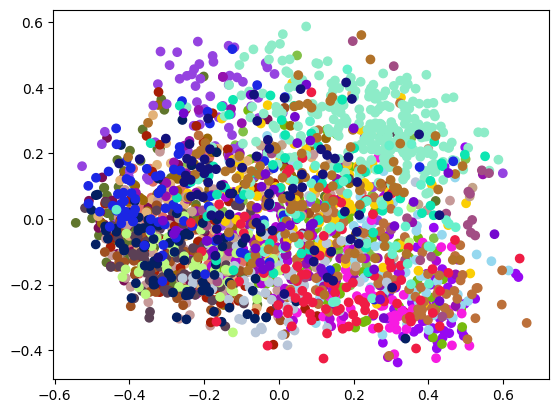

In [91]:
# Use PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=5)
embeddings_2d = pca.fit_transform(X_train)

# Map numeric labels to actual names
mapped_labels = [idx_to_class[label] for label in y_train]

# Define a function to assign colors to labels
# MODIFIED: Use color_mapping dictionary instead of tuple
def assign_colors(label):
    return color_mapping.get(label, 'black')  # Default to black if label not found

# Create color array for all points
colors = list(map(assign_colors, mapped_labels))

# Plot the 2D embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
plt.show()

[[0.0077455  0.04572513 0.00881137 0.00093129 0.01686167 0.00724568
  0.01230951 0.0030881  0.00121973 0.02439273 0.07947828 0.0206615
  0.00238801 0.11883826 0.29034724 0.01233299 0.00272808 0.0032939
  0.02385565 0.0097643  0.00199074 0.0485057  0.17327225 0.00804491
  0.0350044  0.00573325 0.01686011 0.00578673 0.00459664 0.00134339
  0.00207024 0.00477274]]


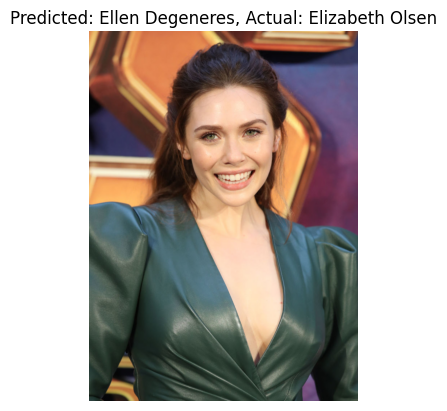

[[1.92354479e-02 2.97359779e-03 8.29653569e-03 1.19802557e-03
  1.70849562e-03 9.94976489e-03 1.23192013e-02 9.53632286e-03
  3.47427664e-02 3.00707794e-03 9.81376611e-04 4.21048062e-03
  3.50078576e-04 2.91775620e-03 3.79874551e-04 2.23027848e-02
  5.26986390e-02 1.30020971e-02 7.57837245e-03 9.95301320e-03
  5.76202525e-04 2.36592178e-03 1.01842689e-03 2.72356899e-03
  3.44477701e-03 3.42505705e-02 3.69183004e-03 8.02040939e-03
  1.07511688e-02 6.39740826e-01 5.71238494e-02 1.89507398e-02]]


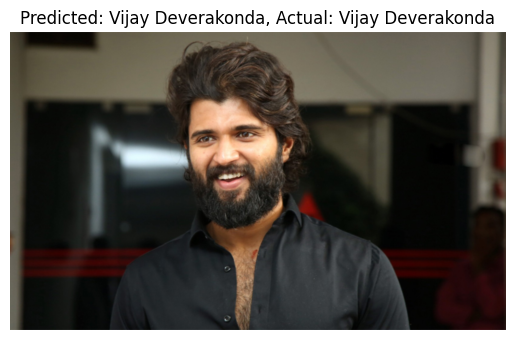

[[0.00645722 0.02197338 0.02943292 0.00033528 0.00343185 0.0193589
  0.02009085 0.0016174  0.00221894 0.13257453 0.17111102 0.00554882
  0.00051879 0.07644135 0.03467064 0.01030221 0.0019062  0.00122514
  0.04709436 0.00302192 0.00039537 0.0094564  0.27967644 0.00178256
  0.07962357 0.01488355 0.00443471 0.00633213 0.00332784 0.00165545
  0.00173939 0.00736088]]


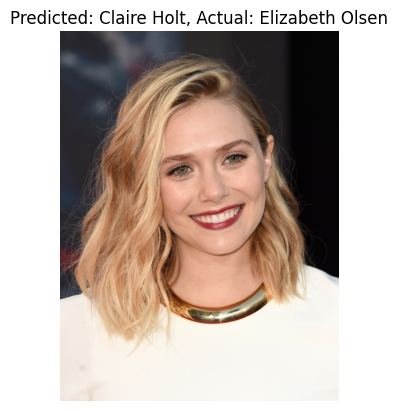

[[0.05152441 0.01893068 0.01131778 0.00065973 0.08645807 0.00692312
  0.01003221 0.01284883 0.00442191 0.04506625 0.01338341 0.01171247
  0.00149671 0.00643579 0.003857   0.19369963 0.14015595 0.0142354
  0.01150945 0.01169259 0.00178227 0.00334865 0.00510793 0.00380152
  0.01205378 0.02486787 0.01964357 0.0495135  0.02099598 0.05179434
  0.00978782 0.14094138]]


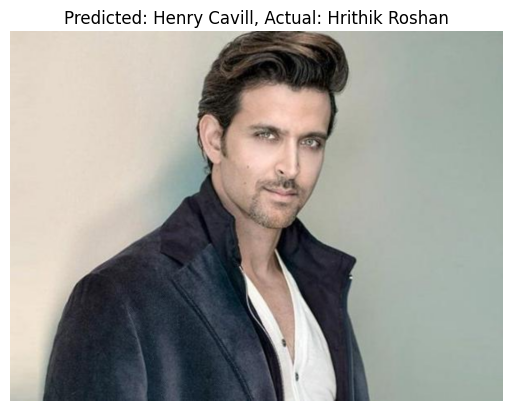

[[0.04486496 0.00170005 0.00283328 0.01787417 0.02610587 0.00824896
  0.01706756 0.22551077 0.00648562 0.00188623 0.00386711 0.00414007
  0.02518696 0.00575963 0.00259626 0.0763717  0.08354109 0.14904574
  0.00633338 0.01640533 0.000316   0.02188941 0.00301048 0.00489271
  0.00377703 0.01040478 0.05874459 0.00849123 0.0255722  0.10981882
  0.01552269 0.01173529]]


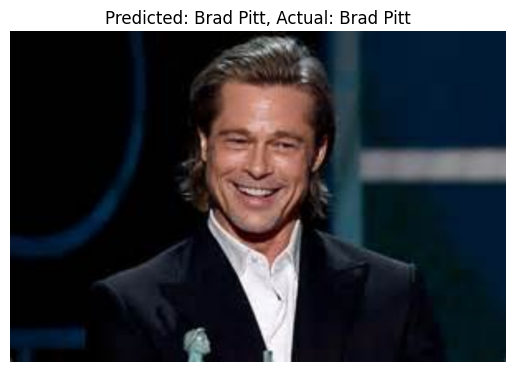

In [92]:
transform_img = transforms.Compose([transforms.Resize(1024)])
transform = transforms.Compose([
        transforms.Resize(1024),
        transforms.ToTensor()
    ])



dataset_val = datasets.ImageFolder(root="/content/val")
val_samples = dataset_val.samples


random_samples = random.choices(val_samples, k=5)

for img_path, true_label in random_samples:

    img_ = transform_img(Image.open(img_path).convert('RGB'))
    img = transform(Image.open(img_path).convert('RGB'))

    # Extract features
    _, embedding = extract_features(mtcnn, model, img)
    if embedding is None:
        print("Could not find face on {}".format(img_path))
        continue
    if embedding.shape[0] > 1:
        print("Multiple faces detected for {}, taking one with highest probability".format(img_path))
        embedding = embedding[0, :]


    predicted_label = clf.predict(embedding.reshape(1, -1))
    print(clf.predict_proba(embedding))

    predicted_class = idx_to_class[predicted_label[0]]
    true_class = idx_to_class[true_label]

    plt.imshow(img_)
    plt.title(f'Predicted: {predicted_class}, Actual: {true_class}')
    plt.axis('off')
    plt.show()

[[7.64780422e-03 3.58195768e-04 7.92754776e-04 9.11439138e-04
  4.63967179e-03 4.56237469e-04 1.29576672e-03 5.78262225e-03
  2.08029269e-03 1.48842685e-03 5.01462579e-04 4.09611791e-04
  4.56251552e-04 3.01082269e-04 2.38411270e-04 6.08341122e-03
  9.87490705e-03 2.65721969e-03 4.02318343e-04 2.12586556e-03
  8.98004291e-01 3.40903777e-04 2.70377232e-04 4.38287261e-03
  3.41786432e-04 1.49576358e-03 1.19497811e-03 1.33981593e-02
  7.96577013e-03 1.32498344e-02 1.64451337e-03 9.20699748e-03]]


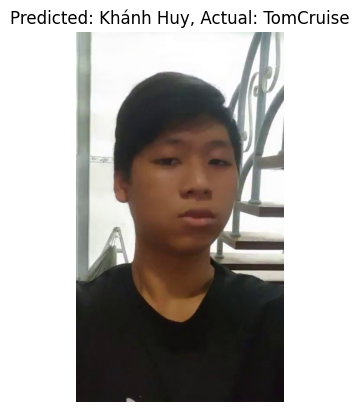

In [95]:
img_path = '/content/new2/Khánh Huy/frame_00136.jpg'

img_ = transform_img(Image.open(img_path).convert('RGB'))
img = transform(Image.open(img_path).convert('RGB'))
_, embedding = extract_features(mtcnn, model, img)

predicted_label = clf.predict(embedding.reshape(1, -1))
# Convert label indexes back to original classes
predicted_class = idx_to_class[predicted_label[0]]
true_class = idx_to_class[true_label]
print((clf.predict_proba(embedding)))
thres = 0.6
if np.max(clf.predict_proba(embedding)) < thres:
    predicted_class = 'Intruder'


plt.imshow(img_)
plt.title(f'Predicted: {predicted_class}, Actual: {"TomCruise"}')
plt.axis('off')
plt.show()